In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tmdb_5000_credits = pd.read_csv('tmdb_5000_credits.csv')
tmdb_5000_movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
#print(tmdb_5000_credits.head(5))
#print(tmdb_5000_movies.head(5))

In [4]:
print(sum(tmdb_5000_movies.duplicated()))
print(tmdb_5000_movies.dtypes)
print(tmdb_5000_movies.isnull().sum())

0
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date             

In [5]:
tmdb_5000_movies['release_date'] = pd.to_datetime(tmdb_5000_movies['release_date'])
print(tmdb_5000_movies.dtypes)

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object


In [6]:
movies_id = tmdb_5000_movies['id'] #tmdb_5000_movies.loc[tmdb_5000_movies['budget']>0, 'id']
movies_budget = tmdb_5000_movies['budget'] #tmdb_5000_movies.loc[tmdb_5000_movies['budget']>0, 'budget']
movies_revenue = tmdb_5000_movies['revenue'] #tmdb_5000_movies.loc[tmdb_5000_movies['budget']>0, 'revenue']

# Finding Highest and Lowest of any numerical data

In [7]:
highest_revenue_movie = tmdb_5000_movies[tmdb_5000_movies['revenue']==tmdb_5000_movies['revenue'].max()]
lowest_revenue_movie = tmdb_5000_movies[tmdb_5000_movies['revenue']==tmdb_5000_movies['revenue'].min()]

In [8]:
print(highest_revenue_movie['title'])
print(lowest_revenue_movie['title'])

0    Avatar
Name: title, dtype: object
83                     The Lovers
135                   The Wolfman
265            The Cat in the Hat
309               Son of the Mask
376                       Volcano
                  ...            
4797                       Cavite
4799                    Newlyweds
4800    Signed, Sealed, Delivered
4801             Shanghai Calling
4802            My Date with Drew
Name: title, Length: 1427, dtype: object


In [9]:
tmdb_5000_movies['profit'] = tmdb_5000_movies['revenue'] - tmdb_5000_movies['budget']

In [10]:
highest_profit_movie = tmdb_5000_movies[tmdb_5000_movies['profit']==tmdb_5000_movies['profit'].max()]
lowest_profit_movie = tmdb_5000_movies[tmdb_5000_movies['profit']==tmdb_5000_movies['profit'].min()]

In [11]:
print(highest_profit_movie['title'])
print(lowest_profit_movie['title'])

0    Avatar
Name: title, dtype: object
13    The Lone Ranger
Name: title, dtype: object


In [12]:
def highest_lowest(col_name):
    highest = tmdb_5000_movies[tmdb_5000_movies[col_name]==tmdb_5000_movies[col_name].max()]
    lowest = tmdb_5000_movies[tmdb_5000_movies[col_name]==tmdb_5000_movies[col_name].min()]
    return highest['title'], lowest['title']

In [13]:
highest_lowest('profit')

(0    Avatar
 Name: title, dtype: object,
 13    The Lone Ranger
 Name: title, dtype: object)

In [14]:
a, b = highest_lowest('budget')
print(b)

265                         The Cat in the Hat
321                               The Campaign
359     Alvin and the Chipmunks: The Road Chip
406                           Arthur Christmas
409                              All That Jazz
                         ...                  
4795                                      Bang
4797                                    Cavite
4800                 Signed, Sealed, Delivered
4801                          Shanghai Calling
4802                         My Date with Drew
Name: title, Length: 1037, dtype: object


# Top films based on some numeric data

In [15]:
import seaborn as sns
def top(col_name, size=10):
    tmdb_5000_movies_sorted = pd.DataFrame(tmdb_5000_movies[col_name].sort_values(ascending=False))[:size]
    tmdb_5000_movies_sorted['original_title'] = tmdb_5000_movies['original_title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(tmdb_5000_movies[col_name])   
    sns.barplot(x=col_name, y='original_title', data=tmdb_5000_movies_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()

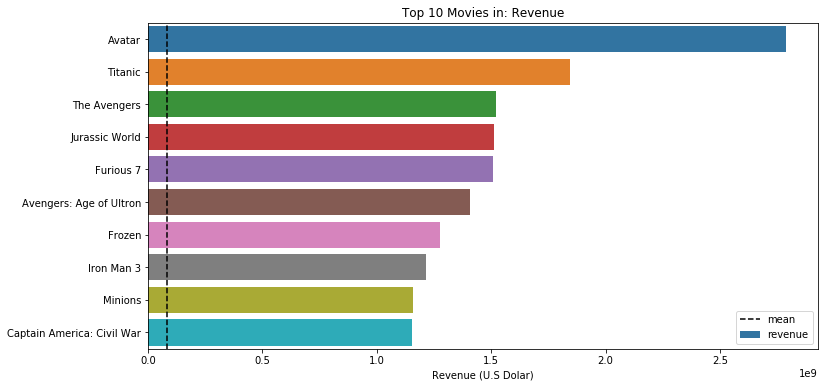

In [16]:
top('revenue', 10)

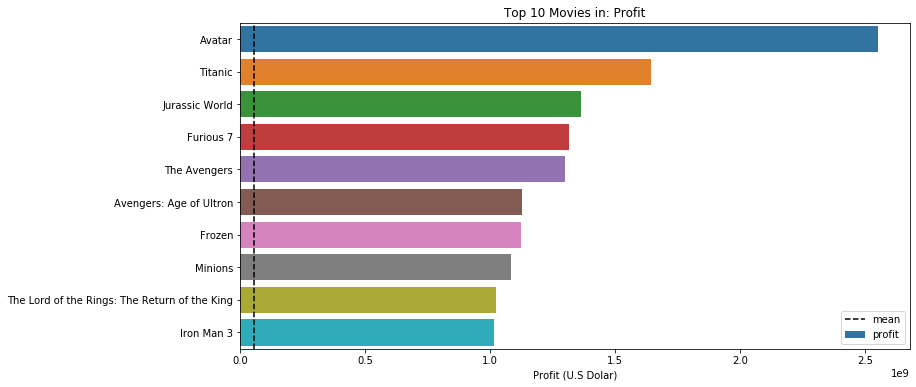

In [17]:
top('profit', 10)

# Each year best profit, revenue or any numeric data

In [18]:
tmdb_5000_movies['release_year'] = tmdb_5000_movies['release_date'].dt.year
release = (tmdb_5000_movies[['release_year','profit','original_title']]).sort_values(['release_year','profit'],
                                                                               ascending=[False, False])
#print(release)
groups_year = (release.groupby('release_year').agg({'profit':'max', 'original_title':'first'})).tail(10)
"""
for gr_name, gr in groups_year:
    print(gr_name)
    print(gr['original_title'])
"""
print(groups_year)


                  profit                   original_title
release_year                                             
2008.0         819558444                  The Dark Knight
2009.0        2550965087                           Avatar
2010.0         866969703                      Toy Story 3
2011.0         928746996   Transformers: Dark of the Moon
2012.0        1299557910                     The Avengers
2013.0        1124219009                           Frozen
2014.0         881405097  Transformers: Age of Extinction
2015.0        1363528810                   Jurassic World
2016.0         903304495       Captain America: Civil War
2017.0                 0                 Growing Up Smith


In [19]:
def each_year_best(col_name, size=10):
    tmdb_5000_movies['release_year'] = tmdb_5000_movies['release_date'].dt.year
    release = (tmdb_5000_movies[['release_year',col_name,'original_title']]).sort_values(['release_year',col_name],
                                                                               ascending=[False, False])
    groups_year = (release.groupby('release_year').agg({col_name:'max', 'original_title':'first'})).tail(size)
    groups_year.index = groups_year.index.astype(int)
    groups_year[col_name] = groups_year[col_name].astype(int)
    groups_year['original_title'] = groups_year['original_title'].astype(str)
    return(groups_year)

In [24]:
each_year_best_profit_film = pd.DataFrame(each_year_best('profit', size=10))
print(each_year_best_profit_film)

          profit                   original_title
2008   819558444                  The Dark Knight
2009  2550965087                           Avatar
2010   866969703                      Toy Story 3
2011   928746996   Transformers: Dark of the Moon
2012  1299557910                     The Avengers
2013  1124219009                           Frozen
2014   881405097  Transformers: Age of Extinction
2015  1363528810                   Jurassic World
2016   903304495       Captain America: Civil War
2017           0                 Growing Up Smith


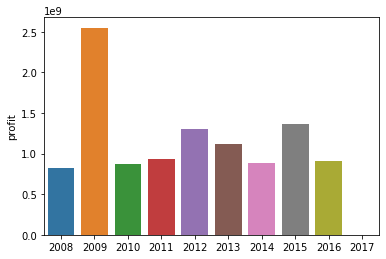

In [25]:
sns.barplot(x=each_year_best_profit_film.index, y="profit", data=each_year_best_profit_film)

# Most filmed genere, cast or director

In [109]:
#data = tmdb_5000_movies['genres'][0]
#print(data)

genres_list = []
genres_data = tmdb_5000_movies['genres']
for i in genres_data:
    json_list = json.loads(i)
    for j in json_list:
        genres_list.append(j['name'])

#print(len(genres_list))
#print(genres_list)
top_ten_genres = pd.DataFrame({'genres': genres_list}).groupby('genres').size().sort_values(ascending=False).tail(10)

print(top_ten_genres)

genres
Fantasy        424
Mystery        348
Animation      234
History        197
Music          185
War            144
Documentary    110
Western         82
Foreign         34
TV Movie         8
dtype: int64


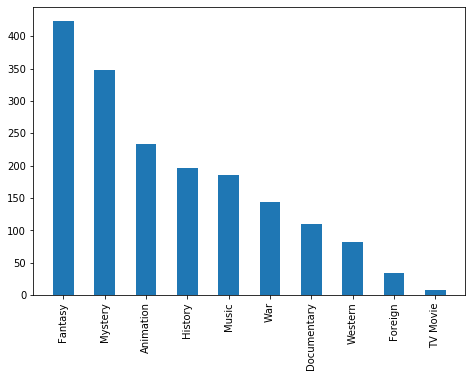

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(top_ten_genres.index), top_ten_genres, width = 0.5)
plt.xticks(rotation='vertical')

plt.show()

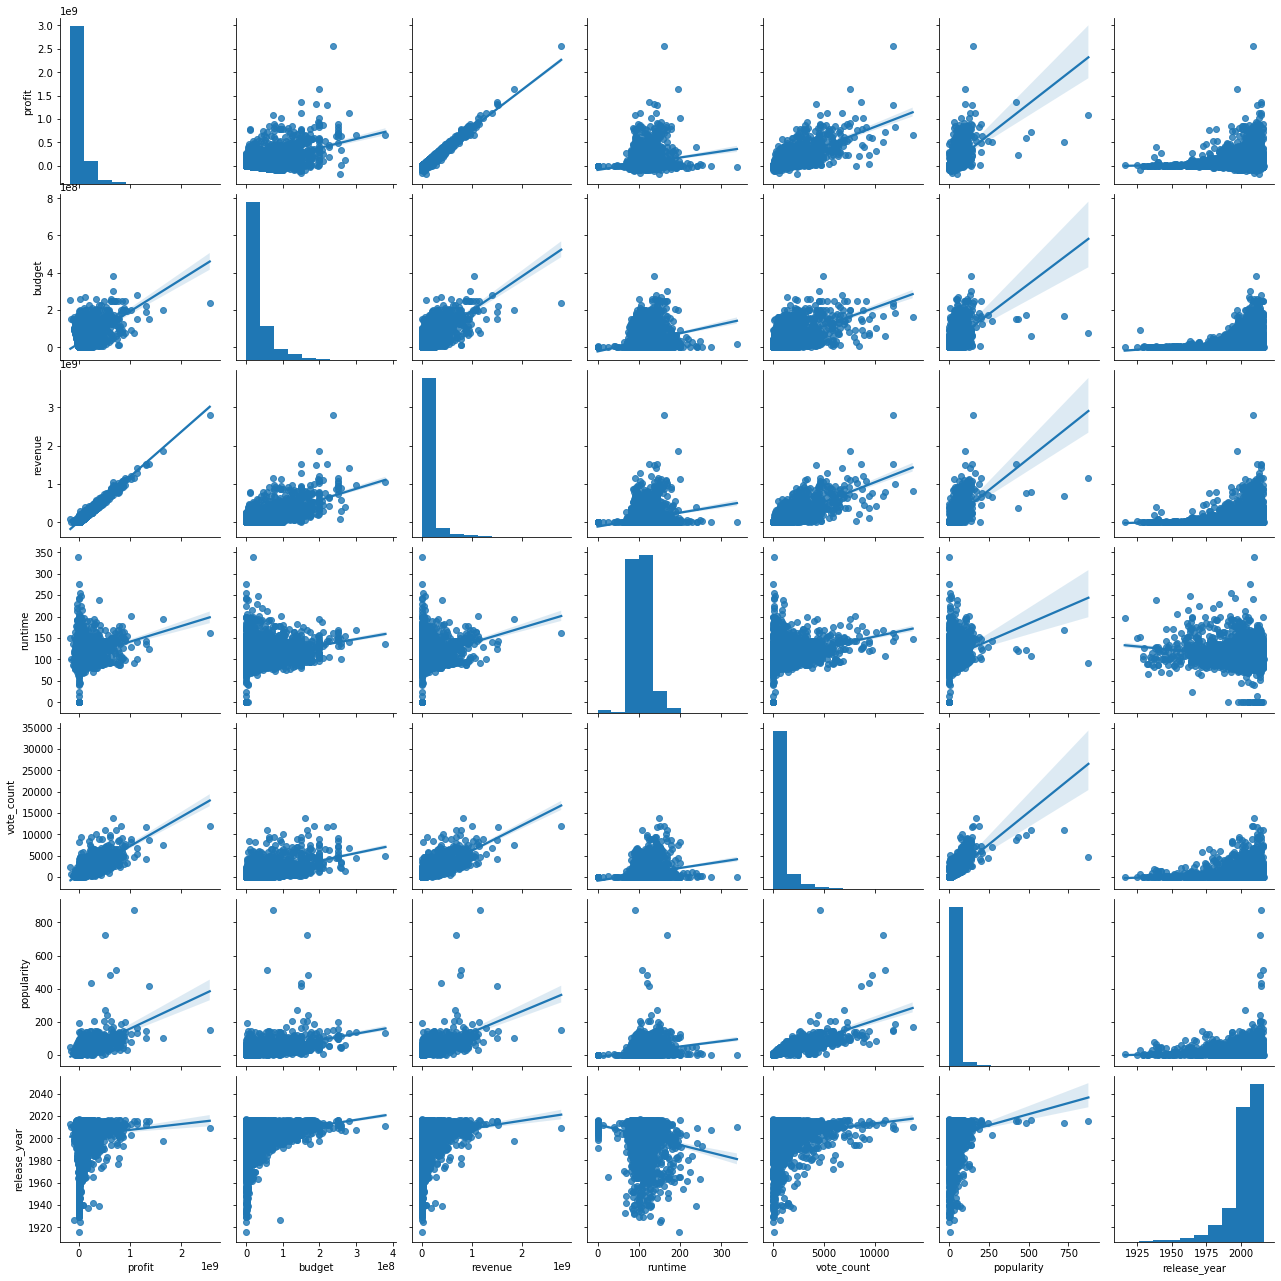

In [112]:
tmdb_5000_movies_related = tmdb_5000_movies[['profit','budget','revenue','runtime', 'vote_count','popularity','release_year']]
sns.pairplot(tmdb_5000_movies_related, kind='reg')

* Movies with ~ 100-200 earn the most revenue, profit and votecount
* Positive correlation between vote count and popularity
* High Votecount means high popularity and positive correlation with revenue and profit
* With year, there is a gradual decrease in the runtime of movies
* High budget garners more popularity